# Mobile Phone Price Classification
by : Hasan Omeis


Here we have two datasets, the training which contain 2000 sample of cell phone features & the price range between 0, 1, 2, and 3.

Then a test dataset which contain 1000 sample size with the same features .

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

our task is to classifiy the test dataset, to know the price range for each one of the 1000 test dataset

____

let's start with importing the libraries


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier 

then let's read the datasets

In [182]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

how about training dataset

In [183]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


& here its shape

In [184]:
train.shape

(2000, 21)

also here the test dataset ( which we'll not need it right now )

In [185]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


also its shape

In [186]:
test.shape

(1000, 21)

____

# Data Processing

we need to have a quick look to the features in the training dataset

In [187]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


we can notice there are some features which are binary ( either 0 or 1 ) like : blue , dual_sim , fc , four_g  and so 

also there are no categorical values , so we'll not be in need for aking dummies

how about the usual problem the Nulls . 

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

great , clean data with no nulls nor missing data . let's move on . 

____

# Features Effect

we need to measure the effect of some features , to know weather we'll keep them ot drop them if they are useless

let's first have a look to distribution of price range among all data set

<Axes: xlabel='price_range', ylabel='count'>

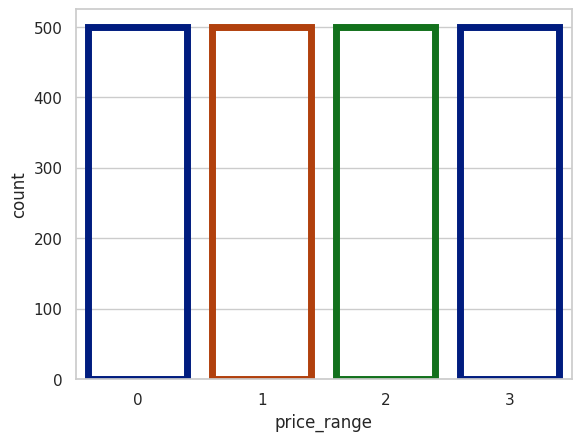

In [189]:
sns.countplot(x="price_range", data=train,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

ok , it's equally distributed , 500 sample size for each class . 

now let's have a list of all features

In [190]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

ok , lets have a look to the battery_power feature , to know unique values for it


In [191]:
print('number of unique values for attery power is : {}'.format(len(train.battery_power.unique())))
train.battery_power.unique()

number of unique values for attery power is : 1094


array([ 842, 1021,  563, ..., 1139, 1467,  858])

more than 1000 unique values will make it not easy to show its statistics , ok let's make a temporary new feature , which will be rounded values for dividing it by 100 , so we can reduce number of unizue values , to make it easy

In [192]:
train['battery code'] = round(train['battery_power']/100)

now how about unique values for the new feature 

In [193]:
print('number of unique values for attery power is : {}'.format(len(train['battery code'].unique())))
train['battery code'].unique()

number of unique values for attery power is : 16


array([ 8., 10.,  6., 18., 19., 20., 14.,  5., 15., 11.,  7., 17., 16.,
        9., 13., 12.])

great  , only 16 values make it easier now to start using seaborn on it , to find correlation between it & price range

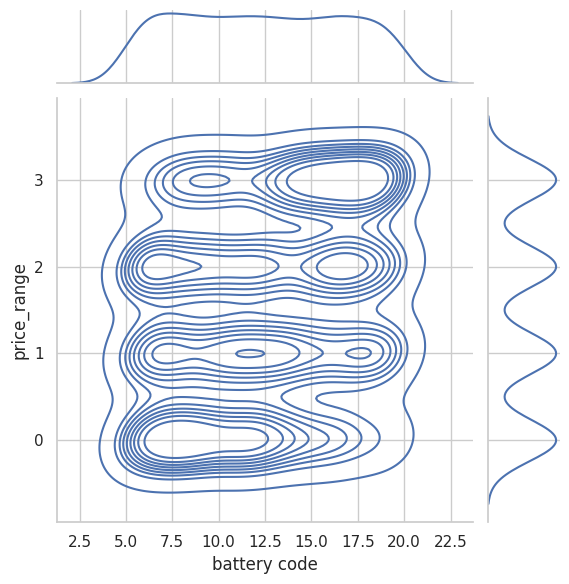

In [194]:
sns.jointplot(train,x="battery code",y="price_range",kind='kde')

looks that majority of cell phones with low battery power , concentrated in the area of less price range , & vice versa

how about the amount of phones with specific battery power versus price range , lets use barplot

<Axes: xlabel='battery code', ylabel='price_range'>

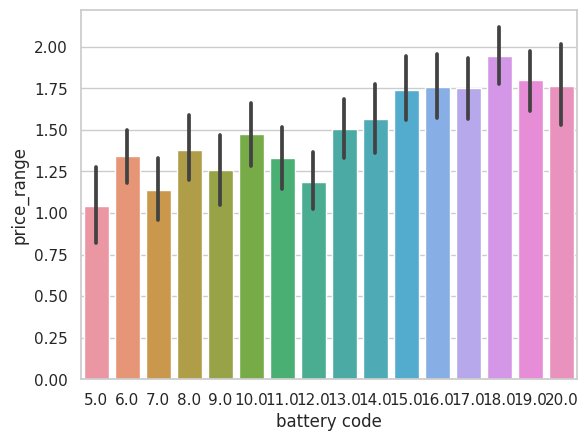

In [195]:
sns.barplot(x="battery code", y="price_range", data=train)

it show kinda same result , which means that battery power is an important feature or training cause it affects the price 


ok , we don't need that new feature any more , let's drop it & we'll use the original battery_power in the training later

In [196]:
train.drop(['battery code'], axis=1, inplace=True)

how about the relationship between dual sim & price range  ? 

<Axes: xlabel='dual_sim', ylabel='price_range'>

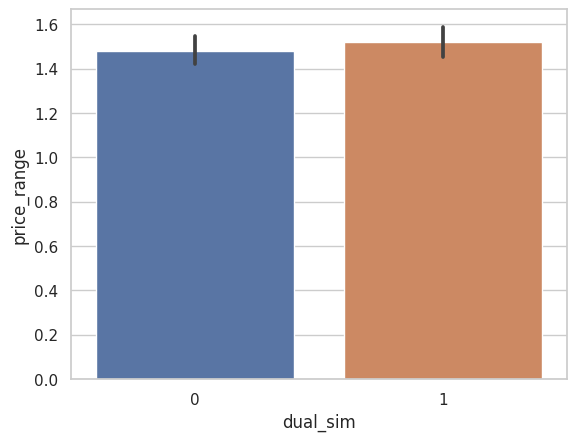

In [197]:
sns.barplot(x="dual_sim", y="price_range", data=train)

oh , it looks that existing or vanishing the dual sim in the phone , will not affect so much in the price range , & that mean that this feature is kinda useless

so it's better to drop it , to avoid any misleading in the training



In [198]:
train.drop(['dual_sim'], axis=1, inplace=True)

____

now let's check the bluetooth & its affect on price

<Axes: xlabel='blue', ylabel='price_range'>

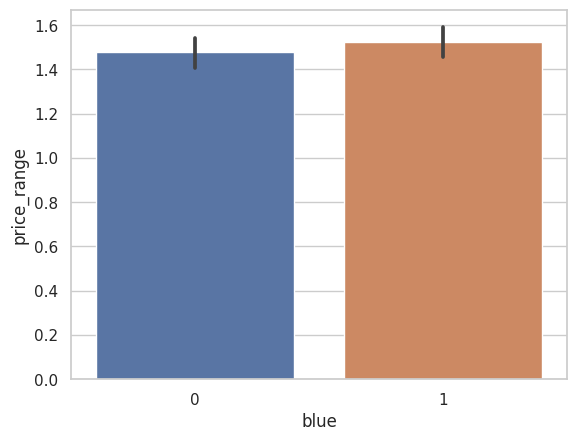

In [199]:
sns.barplot(x="blue", y="price_range", data=train)

again , it doesn't matter weather the phone got bluetooth or not , so dropping it will be a good idea to avoid any misleading

In [200]:
train.drop(['blue'], axis=1, inplace=True)

let's check the clock speed

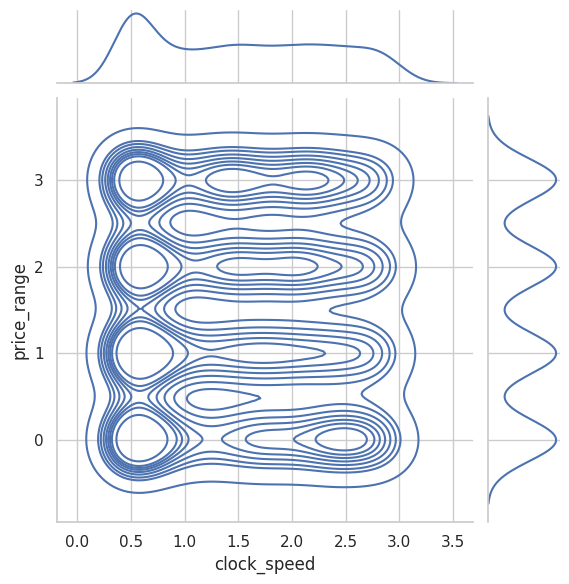

In [201]:
sns.jointplot(train,x="clock_speed", y="price_range", kind='kde')

yea it's affect is not so much , but some how it will be useful , so let's keep it 

____________

# Feature Correlation

also we need to have a look to the correlation some features & the output (Price_range)

since we have several features , so making a one confusion matrix will not be a good idea , cause it will show nothing 

so we'll make a temporary sliced dataframe , which will contain some feature each time , added to the price range

In [202]:
sliced_train = train.loc[:,['price_range','battery_power','clock_speed'] ]

let's have a look to it 

In [203]:
sliced_train.head()

,price_range,battery_power,clock_speed
0,1,842,2.2
1,2,1021,0.5
2,2,563,0.5
3,2,615,2.5
4,1,1821,1.2


ok , let's use heatmap from seaborn to see its correlation

<Axes: >

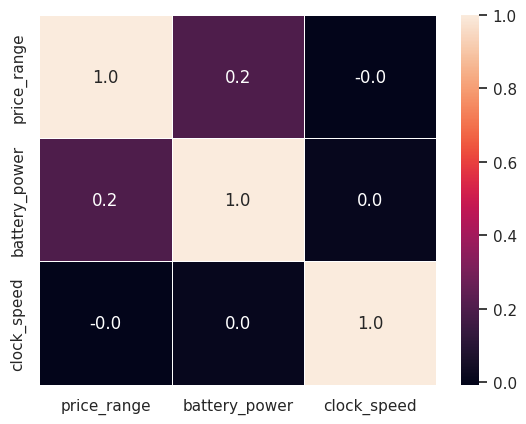

In [204]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

clock speed have no strong correlation , but let's keep it

now we'll repeat the same step with other features

In [205]:
sliced_train = train.loc[:,['price_range','fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores']]   

In [206]:
sliced_train.head()

,price_range,fc,four_g,int_memory,m_dep,mobile_wt,n_cores
0,1,1,0,7,0.6,188,2
1,2,0,1,53,0.7,136,3
2,2,2,1,41,0.9,145,5
3,2,0,0,10,0.8,131,6
4,1,13,1,44,0.6,141,2


<Axes: >

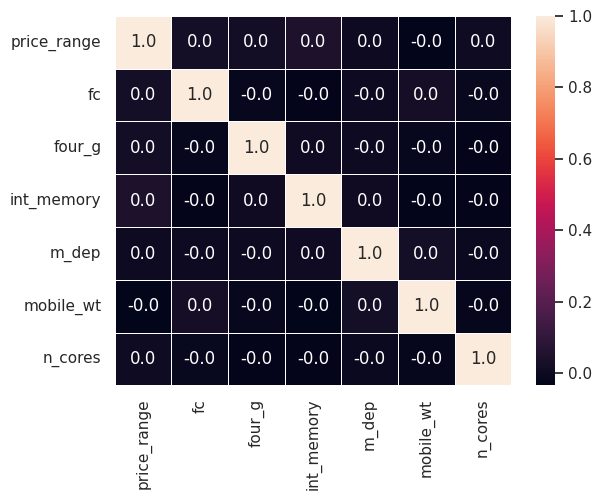

In [207]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

again with other features

In [208]:
sliced_train = train.loc[:,['price_range', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']]   

In [209]:
sliced_train.head()

,price_range,pc,px_height,px_width,ram,sc_h,sc_w
0,1,2,20,756,2549,9,7
1,2,6,905,1988,2631,17,3
2,2,6,1263,1716,2603,11,2
3,2,9,1216,1786,2769,16,8
4,1,14,1208,1212,1411,8,2


<Axes: >

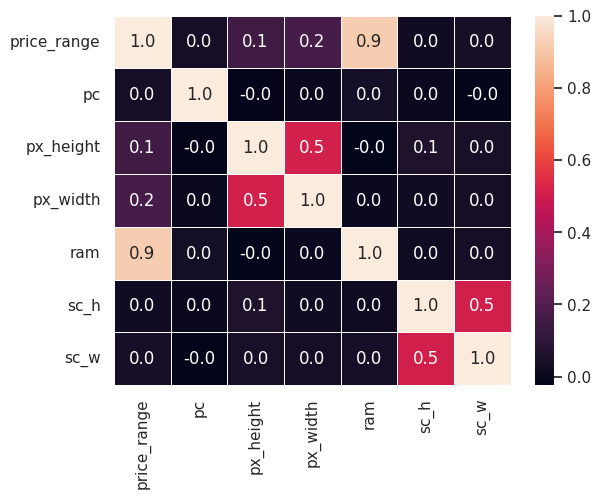

In [210]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

and the last part

In [211]:
sliced_train = train.loc[:,['price_range', 'talk_time', 'three_g', 'touch_screen', 'wifi']]   

In [212]:
sliced_train.head()

,price_range,talk_time,three_g,touch_screen,wifi
0,1,19,0,0,1
1,2,7,1,1,0
2,2,9,1,1,0
3,2,11,1,0,0
4,1,15,1,1,0


<Axes: >

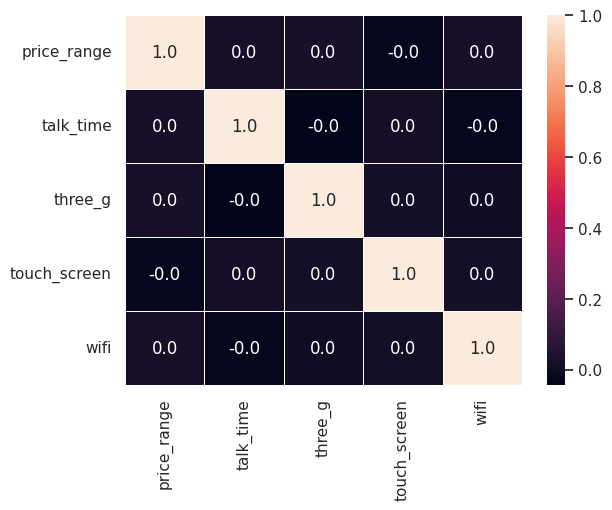

In [213]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

___

# Splitting the Data

ok , since we are ready now , we'll need first to divide the training data into training & test datasets , to be able to check the model accuracy 

let's first specify features & output 

In [214]:
X_data = train.drop(['price_range'], axis=1, inplace=False)
y_data = train['price_range']

now how X looks ? 

In [215]:
X_data.head()

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,2.2,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,0.5,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,0.5,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,2.5,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1.2,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


now let's use sklearn to divide it intro training & testing data

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=44, shuffle =True)

and have a look to their dimensions

In [217]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1340, 18)
X_test shape is  (660, 18)
y_train shape is  (1340,)
y_test shape is  (660,)


___

# Building the Model


how about using SVC ? he is a good classifier

so let's use girdsearch tool , to pick the best parameters for it , specially th kernel type & the value of C


In [218]:
SelectedModel = SVC(gamma='auto')
SelectedParameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5]}


GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

____

ok , what are the best values for it  ? 

In [219]:
print('All Results are :\n', GridSearchResults )
print('===========================================')
print('Best Score is :', GridSearchModel.best_score_)
print('===========================================')
print('Best Parameters are :', GridSearchModel.best_params_)
print('===========================================')
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
    mean_test_score  std_test_score                        params  \
0         0.970896        0.002239  {'C': 1, 'kernel': 'linear'}   
1         0.255970        0.000746     {'C': 1, 'kernel': 'rbf'}   
2         0.969403        0.003731  {'C': 2, 'kernel': 'linear'}   
3         0.255970        0.000746     {'C': 2, 'kernel': 'rbf'}   
4         0.969403        0.003731  {'C': 3, 'kernel': 'linear'}   
5         0.255970        0.000746     {'C': 3, 'kernel': 'rbf'}   
6         0.969403        0.003731  {'C': 4, 'kernel': 'linear'}   
7         0.255970        0.000746     {'C': 4, 'kernel': 'rbf'}   
8         0.969403        0.003731  {'C': 5, 'kernel': 'linear'}   
9         0.255970        0.000746     {'C': 5, 'kernel': 'rbf'}   

   rank_test_score  mean_fit_time  
0                1       0.323272  
1                6       0.040438  
2                2       1.019124  
3                6       0.040399  
4                2       6.504263  
5               

a 97% accuracy looks great , now let's use the best estimator ( with linear kernel & C = 1) to fit our data

In [220]:
SVCModel =  GridSearchModel.best_estimator_
SVCModel.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

now how about its score in training & testing data ? 

In [221]:
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')


y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

SVCModel Train Score is :  0.996268656716418
SVCModel Test Score is :  0.9636363636363636
----------------------------------------------------
Predicted Value for SVCModel is :  [3 2 3 2 0 0 1 0 0 0]


a very good accuracy , & even we avoided OF , since test accuracy is 96%

____

ok let's check if Logistic Regression might help us , also using GirdSearch tool 

In [222]:
SelectedModel = LogisticRegression(penalty='l2' , solver='sag',random_state=33)
SelectedParameters = {'C':[1,2,3,4,5]}


GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 4,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

how about its result ? 

In [223]:
print('All Results are :\n', GridSearchResults )
print('===========================================')
print('Best Score is :', GridSearchModel.best_score_)
print('===========================================')
print('Best Parameters are :', GridSearchModel.best_params_)
print('===========================================')
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
    mean_test_score  std_test_score    params  rank_test_score  mean_fit_time
0         0.636567        0.016401  {'C': 1}                1       0.076289
1         0.636567        0.016401  {'C': 2}                1       0.066957
2         0.636567        0.016401  {'C': 3}                1       0.069855
3         0.636567        0.016401  {'C': 4}                1       0.067819
4         0.636567        0.016401  {'C': 5}                1       0.067288
Best Score is : 0.6365671641791044
Best Parameters are : {'C': 1}
Best Estimator is : LogisticRegression(C=1, random_state=33, solver='sag')


ohhh , only 62 % , which will not be suitable at all . . 

____

ok how about using Voting Classifier , which will use (Decision Tree, Gaussian NB , Bernoulli NB , Multinomial NB , and SGD Classifier ) ? 

let's use it 

In [224]:
DTModel_ = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state = 33)
GaussianNBModel_ = GaussianNB()
BernoulliNBModel_ = BernoulliNB(alpha = 0.1)
MultinomialNBModel_= MultinomialNB(alpha = 0.1)
SGDModel_ = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5)

In [225]:
#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[('DTModel',DTModel_),('GaussianNBModel',GaussianNBModel_),
                                                     ('BernoulliNBModel',BernoulliNBModel_),
                                                     ('MultinomialNBModel',MultinomialNBModel_),
                                                     ('SGDModel',SGDModel_)], voting='hard')
VotingClassifierModel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('DTModel',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=33)),
                             ('GaussianNBModel', GaussianNB()),
                             ('BernoulliNBModel', BernoulliNB(alpha=0.1)),
                             ('MultinomialNBModel', MultinomialNB(alpha=0.1)),
                             ('SGDModel',
                              SGDClassifier(loss='log', max_iter=10000,
                                            tol=1e-05))])

how about the score ? 

In [226]:
#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')

VotingClassifierModel Train Score is :  0.7268656716417911
VotingClassifierModel Test Score is :  0.7287878787878788
----------------------------------------------------


not very good , only SVC which show best accuracy 

____

so let's use it now to apply for the read test dataset

In [227]:
SVCModel =  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3,
                gamma='auto',kernel='linear', max_iter=-1, probability=False, random_state=None,
                shrinking=True, tol=0.001, verbose=False)
SVCModel.fit(X_train, y_train)

print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')

SVCModel Train Score is :  0.996268656716418
SVCModel Test Score is :  0.9636363636363636
----------------------------------------------------


___

# Predict Test Data

ok , let's now have look to the real test data (which is different from test data used in the model) 

In [228]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


we need to drop 'id' feature , plus the two unused feature from training data (blue & dual_sim)

In [229]:
test.drop(['id','blue','dual_sim'], axis=1, inplace=True)

also we need to be sure that there are only 18 features

In [230]:
print('Test Dimension is {}'.format(test.shape))
test.head()

Test Dimension is (1000, 18)


,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1.8,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,0.5,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,2.8,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0.5,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,1.4,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


which will have to be exactly like the 18 features in training dataset

In [231]:
print('X_train Dimension is {}'.format(X_train.shape))
X_train.head()

X_train Dimension is (1340, 18)


,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
97,1665,0.5,3,1,60,0.2,194,6,18,1572,1684,1601,18,17,14,1,0,0
1274,1602,2.7,4,1,46,0.6,118,1,5,273,1062,1862,16,9,2,1,0,1
233,1442,1.0,0,0,27,0.1,192,3,19,231,687,2227,6,5,20,1,1,0
1312,1142,1.1,0,1,6,0.5,198,4,0,739,1766,1273,19,0,6,1,0,0
1323,712,0.5,6,0,27,0.5,86,2,11,1245,1309,2001,11,10,12,1,1,1


perfect , now lets predict it

In [232]:
final_result = SVCModel.predict(test)
final_result

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

and insert it as a new feature in the test dataframe

In [233]:
test.insert(18,'Expected Price',final_result)

here we go , here is the final result

In [234]:
test.head(30)

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Expected Price
0,1043,1.8,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,0.5,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,2.8,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0.5,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,1.4,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
5,1464,2.9,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1,3
6,1718,2.4,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0,3
7,833,2.4,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1,1
8,1111,2.9,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0,3
9,1520,0.5,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1,0


___

# Finally

hope you enjoyed it & found this kernel useful 

